In [11]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg

In [4]:
from google.colab import files
uploaded = files.upload()

Saving German credit data.csv to German credit data (1).csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['German credit data.csv']))

In [9]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


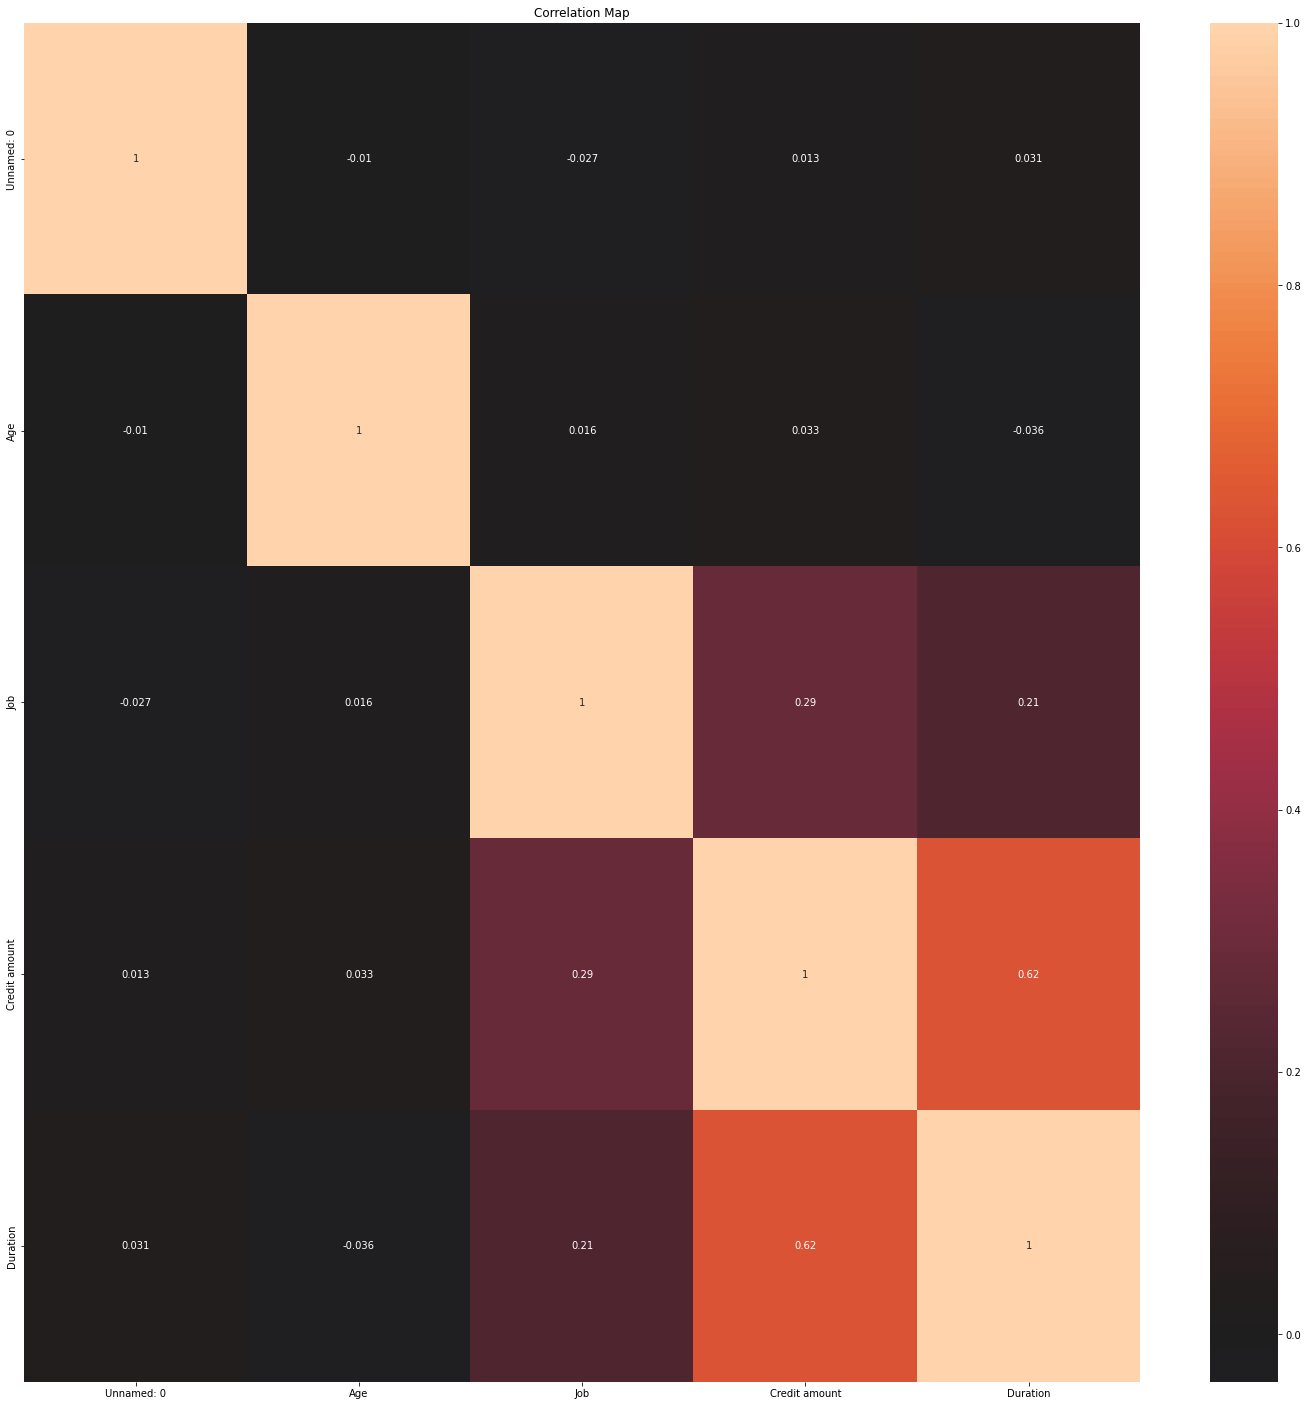

In [26]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [27]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [28]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [39]:
features = ['Age', 'Job', 'Duration']

X = df[features]
y = df['Credit amount']

print(X)
print(y)

     Age  Job  Duration
0     67    2         6
1     22    2        48
2     49    1        12
3     45    2        42
4     53    2        24
..   ...  ...       ...
995   31    1        12
996   40    3        30
997   38    2        12
998   23    2        45
999   27    2        45

[1000 rows x 3 columns]
0      1169
1      5951
2      2096
3      7882
4      4870
       ... 
995    1736
996    3857
997     804
998    1845
999    4576
Name: Credit amount, Length: 1000, dtype: int64


In [7]:
df_final = pd.get_dummies(df)
df_final.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,0,67,2,1169,6,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,1,22,2,5951,48,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,49,1,2096,12,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,3,45,2,7882,42,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,53,2,4870,24,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [20]:
X = df_final.drop(columns=['Risk_good','Risk_bad'])

y = df_final['Risk_bad']

In [21]:
ss = StandardScaler()

ss.fit(X)

X = ss.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
ct = dtree(
           criterion="entropy",
           max_depth=None
           )
_=ct.fit(X_train,y_train)

In [23]:
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.65

In [24]:
fi = ct.feature_importances_
fi

array([0.25150055, 0.11811186, 0.04062496, 0.22017954, 0.09058555,
       0.        , 0.01491911, 0.00815613, 0.01188778, 0.        ,
       0.03237827, 0.00311808, 0.        , 0.        , 0.05264536,
       0.05803617, 0.01878827, 0.00498516, 0.01420789, 0.        ,
       0.02300895, 0.02218694, 0.0101587 , 0.00452072, 0.        ])

In [25]:
list(zip(df.columns, fi))

[('Unnamed: 0', 0.251500554836713),
 ('Age', 0.11811186134739524),
 ('Sex', 0.04062495801589496),
 ('Job', 0.22017954318217456),
 ('Housing', 0.09058554863037749),
 ('Saving accounts', 0.0),
 ('Checking account', 0.014919108922165641),
 ('Credit amount', 0.008156127183854023),
 ('Duration', 0.011887779013585962),
 ('Purpose', 0.0),
 ('Risk', 0.032378266941049914)]

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6933333333333334
